In [1]:
!pip3 install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.7 MB/s eta 0:00:00


# Importing the necessary packages

In [142]:
import gymnasium
from gymnasium import spaces, utils
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from operator import add
from math import sqrt

In [143]:
class RandomMazeEnv(gymnasium.Env):

    metadata = {"render_modes" : ["human", "rgb_array"], "render_fps": 4}
    # Define constants for clearer code
    LEFT = 0
    DOWN = 3
    RIGHT = 2
    UP = 1

    def __init__(self, render = None, seed = None):
        super(RandomMazeEnv, self).__init__()

        p = 0.8
        self.grid_size = 3 * 4
        # Number of discrete actions, we have four: left, down, right, up
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(12)
        self.P = {
            0: {
                0: [
                    [p + (1-p)/2, 0, -0.04, False],
                    [(1-p)/2, 4, -0.04, False]
                ],
                3: [
                    [(1-p)/2, 0, -0.04, False],
                    [p, 4, -0.04, False],
                    [(1-p)/2, 1, -0.04, False]
                ],
                2: [
                    [(1-p)/2, 4, -0.04, False],
                    [p, 1, -0.04, False],
                    [(1-p)/2, 0, -0.04, False]
                ],
                1: [
                    [(1-p)/2, 1, -0.04, False],
                    [p + (1-p)/2, 0, -0.04, False],
                ]
            },
            1: {
                0: [
                    [(1-p), 1, -0.04, False],
                    [p, 0, -0.04, False],
                ],
                3: [
                    [(1-p)/2, 0, -0.04, False],
                    [p, 1, -0.04, False],
                    [(1-p)/2, 2, -0.04, False]
                ],
                2: [
                    [(1-p), 1, -0.04, False],
                    [p, 2, -0.04, False],
                ],
                1: [
                    [(1-p)/2, 2, -0.04, False],
                    [p, 1, -0.04, False],
                    [(1-p)/2, 0, -0.04, False]
                ]
            },
            2: {
                0: [
                    [(1-p)/2, 2, -0.04, False],
                    [p, 1, -0.04, False],
                    [(1-p)/2, 6, -0.04, False]
                ],
                3: [
                    [(1-p)/2, 1, -0.04, False],
                    [p, 6, -0.04, False],
                    [(1-p)/2, 3, 1.0, True]
                ],
                2: [
                    [(1-p)/2, 6, -0.04, False],
                    [p, 3, 1.0, True],
                    [(1-p)/2, 2, -0.04, False]
                ],
                1: [
                    [(1-p)/2, 3, 1.0, True],
                    [p, 2, -0.04, False],
                    [(1-p)/2, 1, -0.04, False]
                ]
            },
            3: {
                0: [
                    [1.0, 3, 0.0, True]
                ],
                3: [
                    [1.0, 3, 0.0, True]
                ],
                2: [
                    [1.0, 3, 0.0, True]
                ],
                1: [
                    [1.0, 3, 0.0, True]
                ]
            },
            4: {
                0: [
                    [(1-p)/2, 0, -0.04, False],
                    [p, 4, -0.04, False],
                    [(1-p)/2, 8, -0.04, False]
                ],
                3: [
                    [(1-p), 4, -0.04, False],
                    [p, 8, -0.04, False],
                ],
                2: [
                    [(1-p)/2, 8, -0.04, False],
                    [p, 4, -0.04, False],
                    [(1-p)/2, 0, -0.04, False]
                ],
                1: [
                    [(1-p), 4, -0.04, False],
                    [p, 0, -0.04, False],
                ]
            },
            5: {
                0: [
                    [1.0, 5, 0.0, True]
                ],
                3: [
                    [1.0, 5, 0.0, True]
                ],
                2: [
                    [1.0, 5, 0.0, True]
                ],
                1: [
                    [1.0, 5, 0.0, True]
                ]
            },
            6: {
                0: [
                    [(1-p)/2, 2, -0.04, False],
                    [p, 6, -0.04, False],
                    [(1-p)/2, 10, -0.04, False]
                ],
                3: [
                    [(1-p)/2, 6, -0.04, False],
                    [p, 10, -0.04, False],
                    [(1-p)/2, 7, -1.0, True]
                ],
                2: [
                    [(1-p)/2, 10, -0.04, False],
                    [p, 7, -1.0, True],
                    [(1-p)/2, 2, -0.04, False]
                ],
                1: [
                    [(1-p)/2, 7, -1.0, True],
                    [p, 2, -0.04, False],
                    [(1-p)/2, 6, -0.04, False]
                ]
            },
            7: {
                0: [
                    [1.0, 7, 0.0, True]
                ],
                3: [
                    [1.0, 7, 0.0, True]
                ],
                2: [
                    [1.0, 7, 0.0, True]
                ],
                1: [
                    [1.0, 7, 0.0, True]
                ]
            },
            8: {
                0: [
                    [(1-p)/2, 4, -0.04, False],
                    [p + (1-p)/2, 8, -0.04, False]
                ],
                3: [
                    [p + (1-p)/2, 8, -0.04, False],
                    [(1-p)/2, 9, -0.04, False]
                ],
                2: [
                    [(1-p)/2, 8, -0.04, False],
                    [p, 9, -0.04, False],
                    [(1-p)/2, 4, -0.04, False]
                ],
                1: [
                    [(1-p)/2, 9, -0.04, False],
                    [p, 4, -0.04, False],
                    [(1-p)/2, 8, -0.04, False]
                ]
            },
            9: {
                0: [
                    [(1-p), 9, -0.04, False],
                    [p, 8, -0.04, False]
                ],
                3: [
                    [(1-p)/2, 8, -0.04, False],
                    [p, 9, -0.04, False],
                    [(1-p)/2, 10, -0.04, False]
                ],
                2: [
                    [(1-p), 9, -0.04, False],
                    [p, 10, -0.04, False]
                ],
                1: [
                    [(1-p)/2, 10, -0.04, False],
                    [p, 9, -0.04, False],
                    [(1-p)/2, 8, -0.04, False]
                ]
            },
            10: {
                0: [
                    [(1-p)/2, 6, -0.04, False],
                    [p, 9, -0.04, False],
                    [(1-p)/2, 10, -0.04, False]
                ],
                3: [
                    [(1-p)/2, 9, -0.04, False],
                    [p, 10, -0.04, False],
                    [(1-p)/2, 11, -0.04, False]
                ],
                2: [
                    [(1-p)/2, 10, -0.04, False],
                    [p, 11, -0.04, False],
                    [(1-p)/2, 6, -0.04, False]
                ],
                1: [
                    [(1-p)/2, 11, -0.04, False],
                    [p, 6, -0.04, False],
                    [(1-p)/2, 9, -0.04, False]
                ]
            },
            11: {
                0: [
                    [(1-p)/2, 7, -1.0, True],
                    [p, 10, -0.04, False],
                    [(1-p)/2, 11, -0.04, False]
                ],
                3: [
                    [(1-p)/2, 10, -0.04, False],
                    [p + (1-p)/2, 11, -0.04, False]
                ],
                2: [
                    [p + (1-p)/2, 11, -0.04, False],
                    [(1-p)/2, 7, -1.0, True]
                ],
                1: [
                    [(1-p)/2, 11, -0.04, False],
                    [p, 7, -1.0, True],
                    [(1-p)/2, 10, -0.04, False]
                ]
            }
        }
        self.seed(seed)
        self.start_state = 8
        self.state = self.start_state
        self.gamma = 0.99 # discount factor

    def seed(self, seed=None):
        self.np_random, seed = gymnasium.utils.seeding.np_random(seed)
        return [seed]

    def step(self, action):
        transitions = self.P[self.state][action]
        i = self.np_random.choice(len(transitions), p=[t[0] for t in transitions])
        prob, next_state, reward, done = transitions[i]
        self.state = next_state
        return next_state, reward, done, {}

        # moving to the next state
        self.state = next_state
        return next_state, reward, done, {}

    def reset(self, seed = None):
        self.seed(seed)
        # Reset the state of the environment to an initial state
        self.state = self.start_state
        return self.state

    def close(self):
         pass

In [144]:
# Implementing the generateTrajectory function with maxsteps
def generateTrajectory(env, policy, maxSteps, seed = None):
  state = env.reset(seed = seed)
  trajectory = []
  for _ in range(maxSteps):
    # choosing an action from policy
    action = policy[state] # pi(a|s)
    next_state, reward, done, _ = env.step(action)
    trajectory.append((state, action, reward, next_state, done))
    if done:
      break
    state = next_state

  if done:
    return trajectory
  else:
    return [] # discard partial trajectories

In [145]:
maxSteps = 100
seed = 123
env = RandomMazeEnv(seed = seed)
policy = [2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0]
trajectory = generateTrajectory(env, policy, maxSteps, seed = seed)
print("Printing Trjactory")
print(trajectory)
print("Total number of states encountered : {}".format(len(trajectory)))

Printing Trjactory
[(8, 1, -0.04, 4, False), (4, 1, -0.04, 4, False), (4, 1, -0.04, 0, False), (0, 2, -0.04, 1, False), (1, 2, -0.04, 1, False), (1, 2, -0.04, 2, False), (2, 2, -0.04, 2, False), (2, 2, 1.0, 3, True)]
Total number of states encountered : 8


In [170]:
# Implementing a function for deacaying the step parameter
def decayAlpha(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  if decayType == "linear":
   decay_rate = (finalValue - initialValue) / maxSteps
   for curr_step in range(maxSteps):
    curr_alpha = initialValue + decay_rate * curr_step
    alphas.append(curr_alpha)

  elif decayType == "exponential":
    decay_rate = (np.log(finalValue/initialValue)) / maxSteps
    for curr_step in range(maxSteps):
      curr_alpha = initialValue * np.exp(decay_rate * curr_step)
      alphas.append(curr_alpha)

  return alphas

# Linear Decay

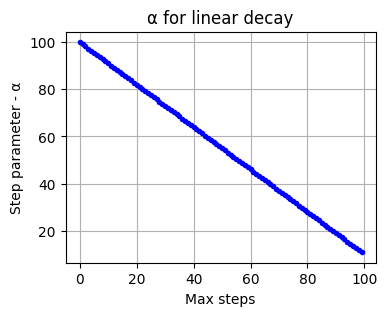

In [171]:
decayType = "linear"
maxSteps = 100
alphas = decayAlpha(100, 10, maxSteps, decayType)

# plotting the alphas
plt.figure(figsize = (4, 3))
plt.plot(range(maxSteps), alphas, color = "blue", marker = ".")
plt.ylabel("Step parameter - α")
plt.xlabel("Max steps")
plt.title("α for {} decay".format(decayType))
plt.grid(True)
plt.show()

# Exponential Decay

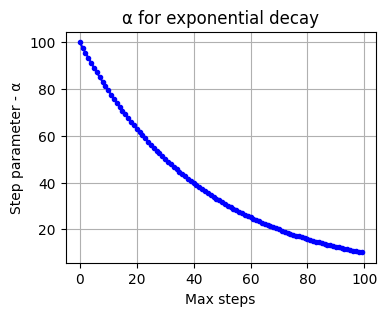

In [172]:
decayType = "exponential"
maxSteps = 100
alphas = decayAlpha(100, 10, maxSteps, decayType)

# plotting the alphas
plt.figure(figsize = (4, 3))
plt.plot(range(maxSteps), alphas, color = "blue", marker = ".")
plt.ylabel("Step parameter - α")
plt.xlabel("Max steps")
plt.title("α for {} decay".format(decayType))
plt.grid(True)
plt.show()

# Implementing the Monte Carlo Algorithm

In [147]:
# Implementing the monte carlo prediction algorithm for RWE environment
def MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed):
    values = np.zeros(env.observation_space.n)
    values_eps = []
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)

    # Iterating over the episodes
    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        trajectory = generateTrajectory(env, policy, maxSteps, seed=episode_seed)
        if not trajectory:
            continue
        G = 0
        visited_states = set()

        for traj_idx in range(len(trajectory) - 1, -1, -1): # iterating the trajectory in reverse order
            state, action, reward, next_state, done = trajectory[traj_idx]
            G = gamma * G + reward # return calculation
            if mctype == "FVMC" and state not in visited_states:
                values[state] += alphas[episode] * (G - values[state])
                visited_states.add(state)
            elif mctype == "EVMC":
                values[state] += alphas[episode] * (G - values[state])
                if mctype == "FVMC":
                    visited_states.add(state)  # avoid traversing to the next again

        values_eps.append(np.copy(values))

    return values_eps

In [148]:
gamma = 0.99
numEpisodes = 500
mctype = "FVMC"
initialValue = 0.1
finalValue = 0.01
decayType = "exponential"
global_seed = 123

values = MonteCarloPrediction(env, policy, initialValue, finalValue, 100, numEpisodes, gamma, decayType, mctype, global_seed = 123)
print(values[-1])

[0.84003489 0.89973816 0.97160289 0.         0.78666412 0.
 0.57764719 0.         0.71118601 0.59731641 0.         0.        ]


# Implementing the Temporal Difference Algorithm

In [149]:
# Implementing the Temporal Difference learning approach
def TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed):
    # Initialize the values with zeros
    values = np.zeros(env.observation_space.n)
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    values_eps = []

    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        # Resetting the environment with a new seed for each episode
        state = env.reset(seed=episode_seed)
        for step in range(maxSteps):
            # Choosing an action from the policy
            action = policy[state]
            next_state, reward, done, _ = env.step(action)
            if not done:
              td_target = reward + gamma * values[next_state]
            else:
              td_target = reward
            td_error = td_target - values[state]
            values[state] += alphas[episode] * td_error
            if done:
                break
            state = next_state

        values_eps.append(np.copy(values))

    return values_eps

In [150]:
gamma = 0.99
numEpisodes = 100
initialValue = 0.1
finalValue = 0.01
decayType = "exponential"
global_seed = 123

values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
print(values[numEpisodes - 1])

[ 0.57487668  0.79156486  0.92202897  0.          0.38064506  0.
  0.19021933  0.          0.15142168 -0.0232719   0.          0.        ]


# Monte carlo (linear alpha)

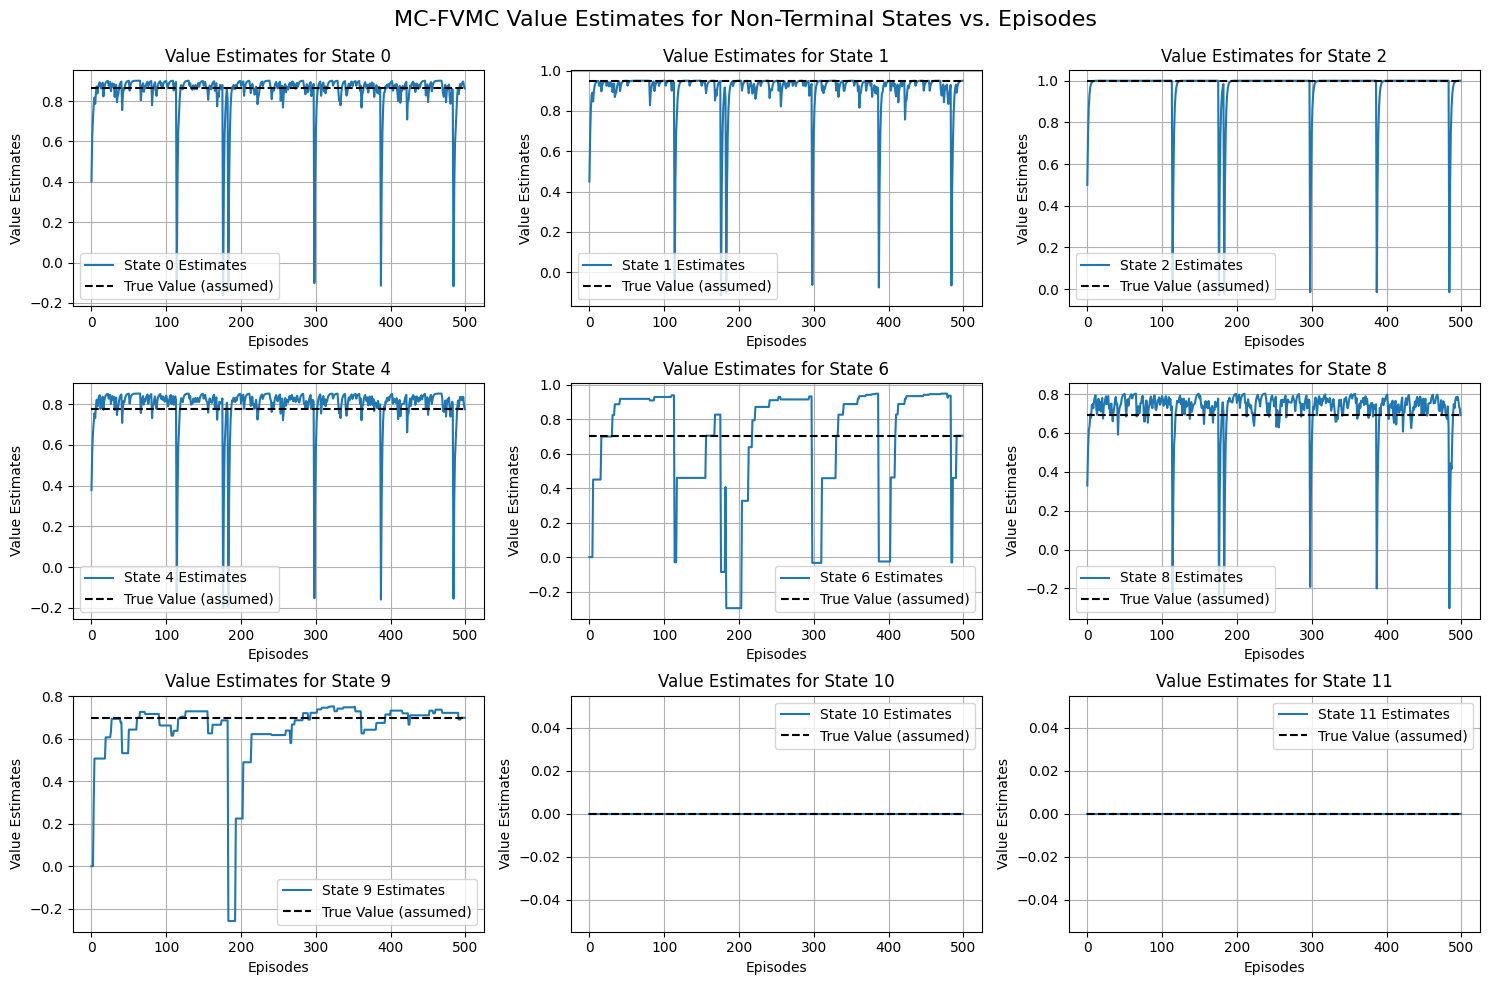

In [87]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('MC-FVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# FVMC Averaged plots

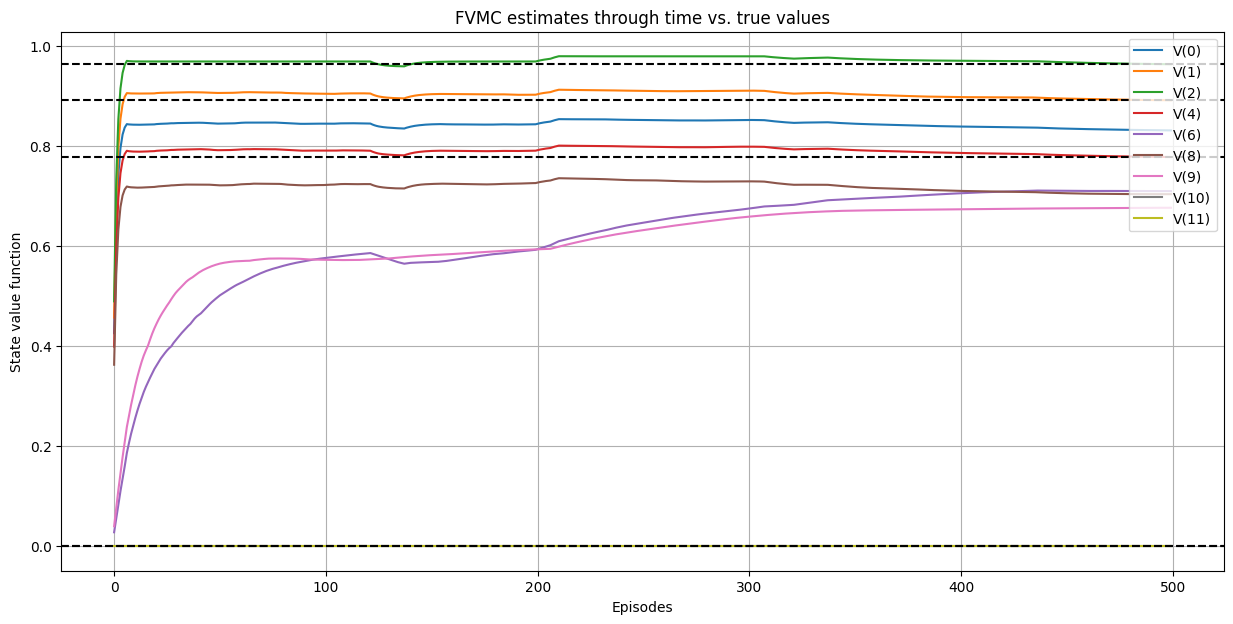

In [108]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('FVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

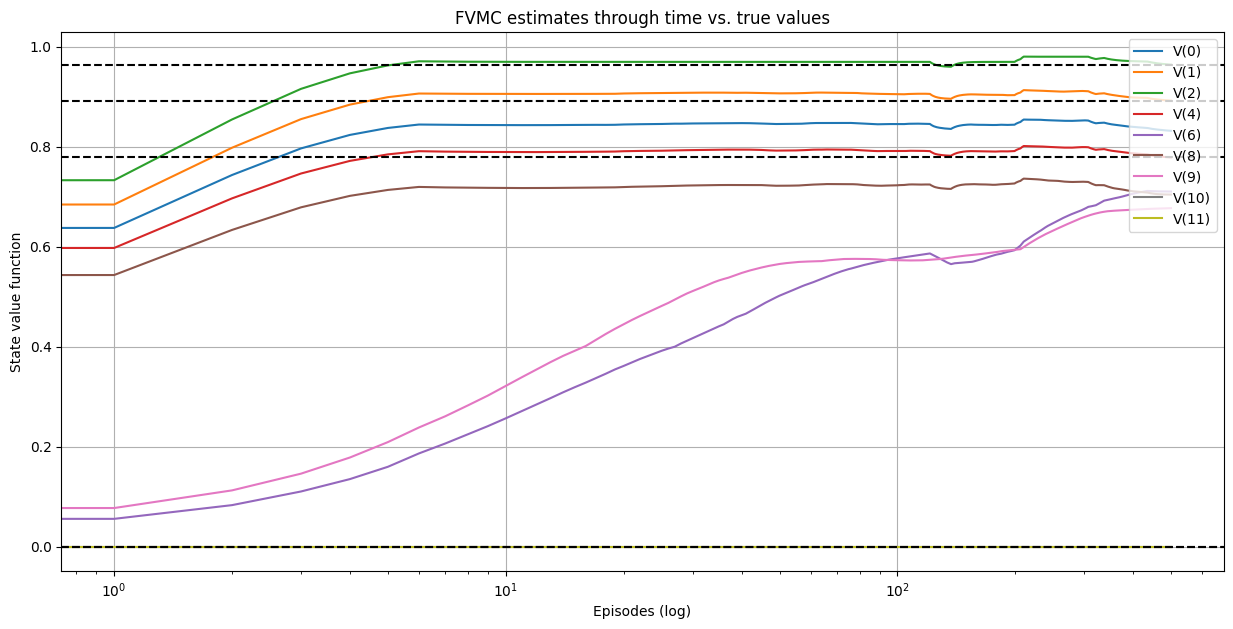

In [151]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
mctype = "FVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('FVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Monte carlo (exponential alpha)

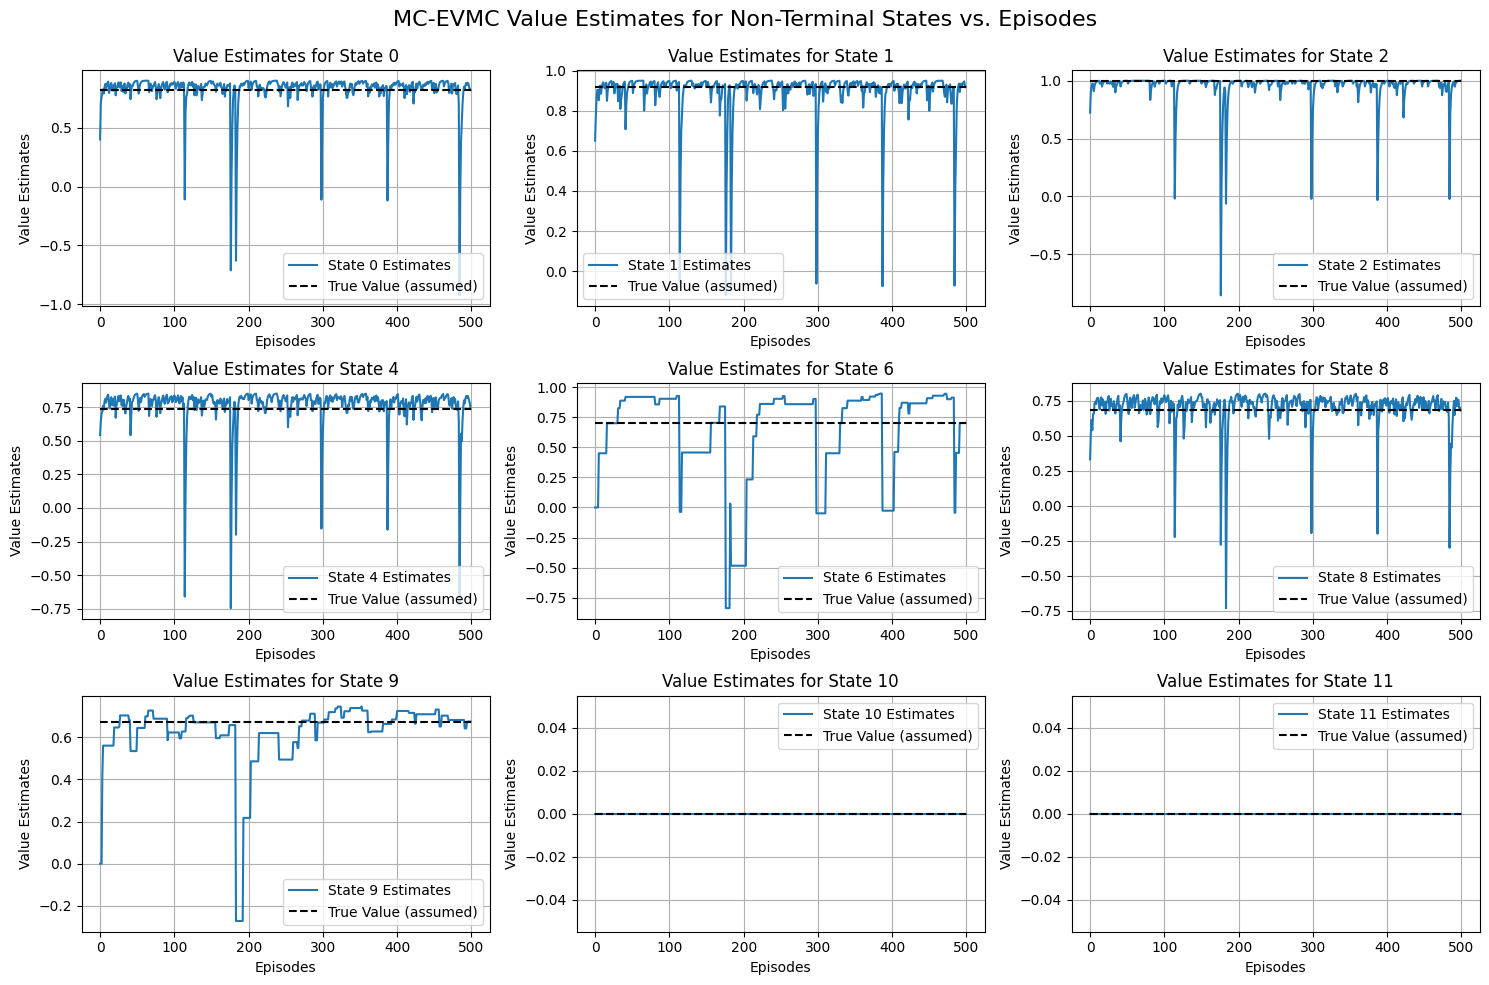

In [93]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "EVMC"
global_seed = 123

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('MC-EVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# EVMC Averaged plots

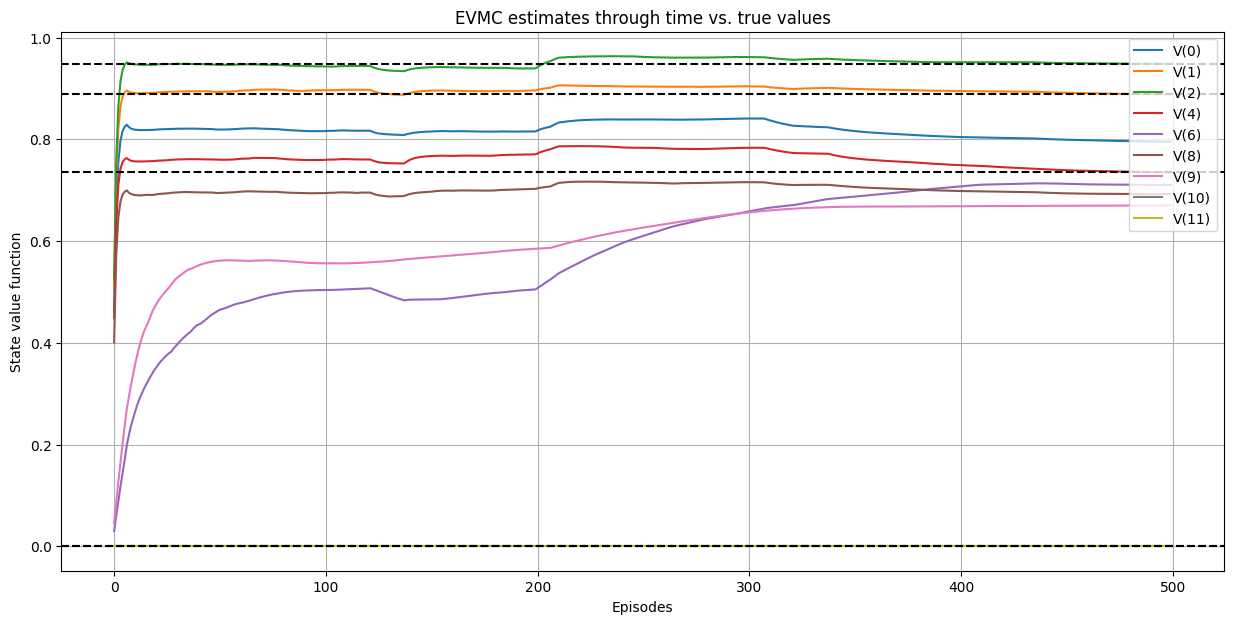

In [107]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
mctype = "EVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('EVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# EVMC Averaged (log Episodes)

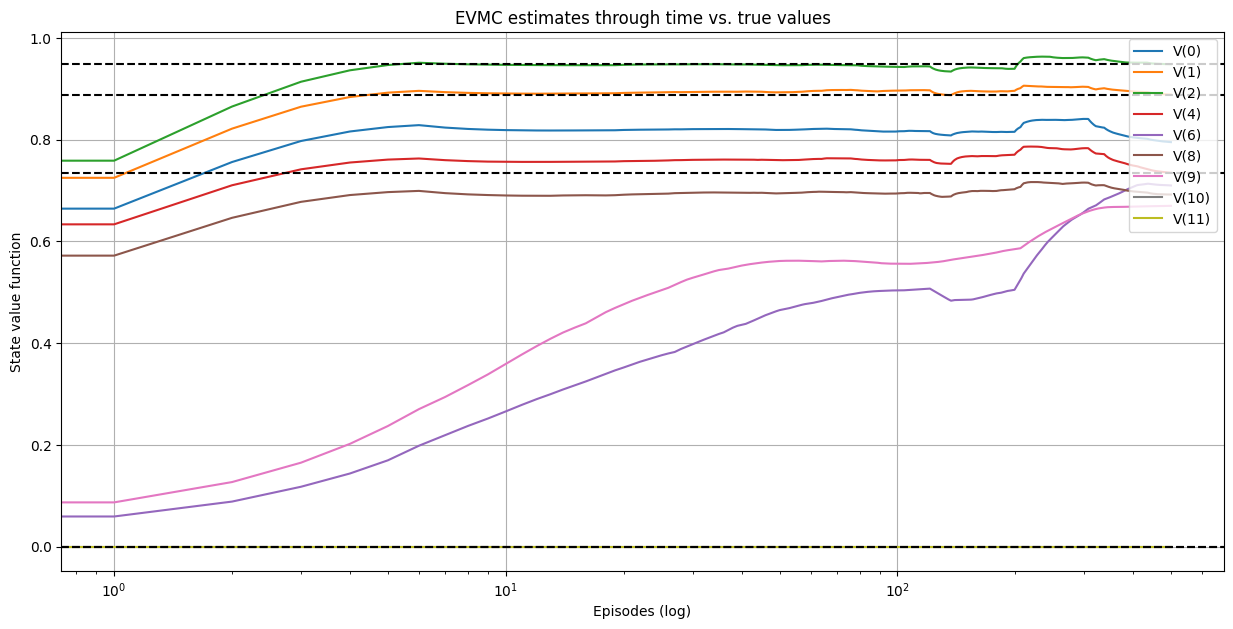

In [152]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
mctype = "EVMC"
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('EVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# TD (linear alpha)

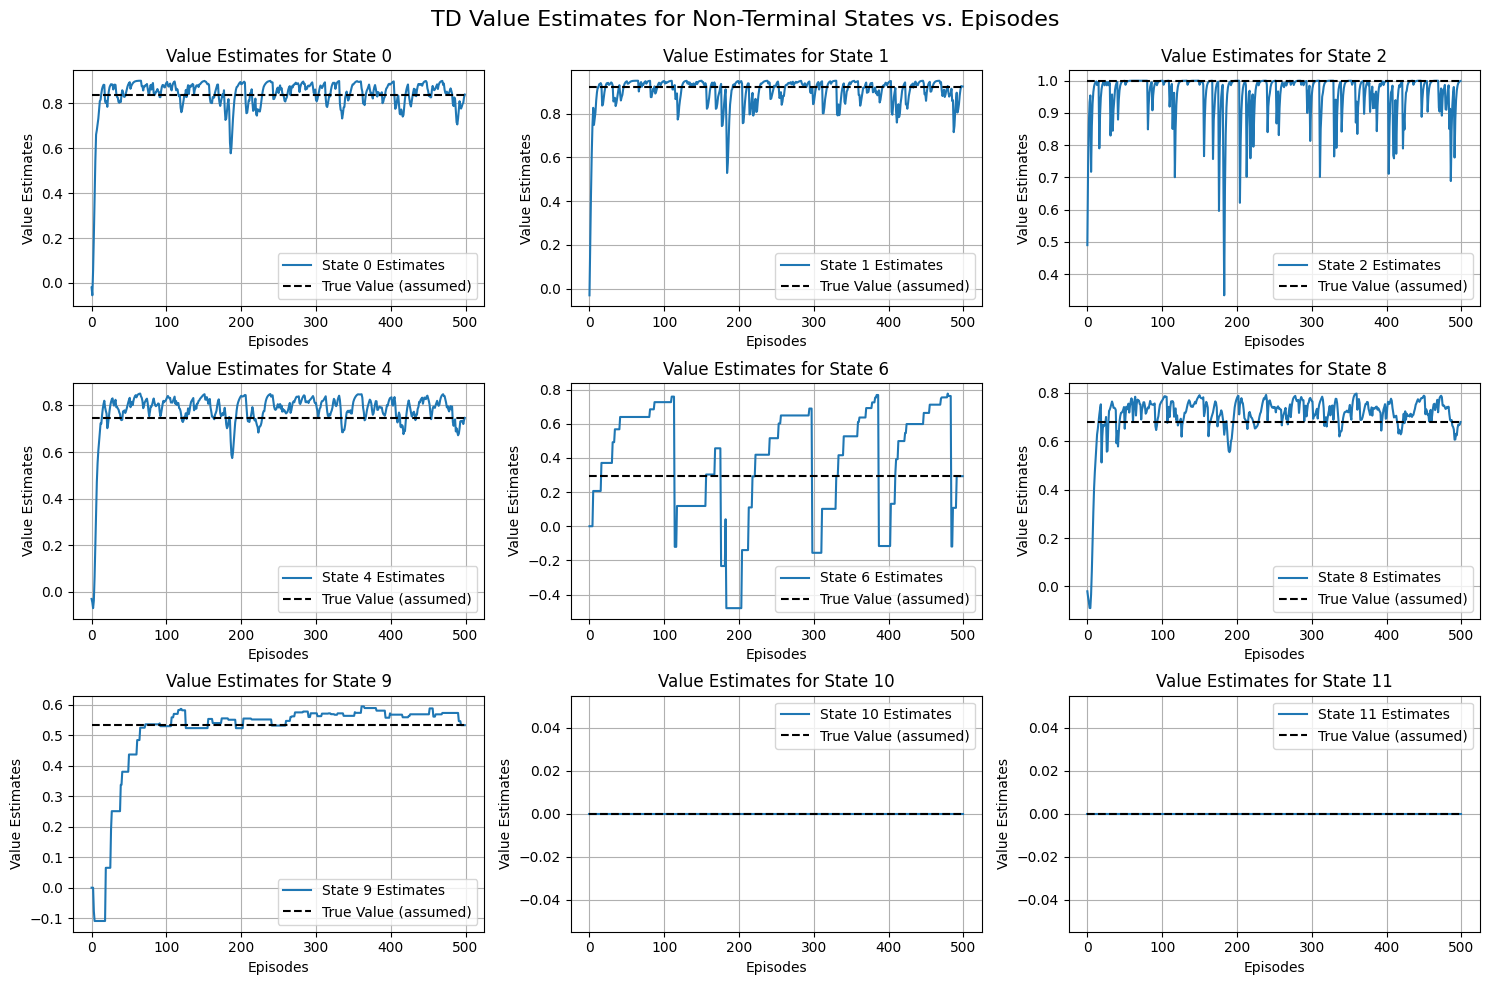

In [92]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123

state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# TD (exponential alpha)

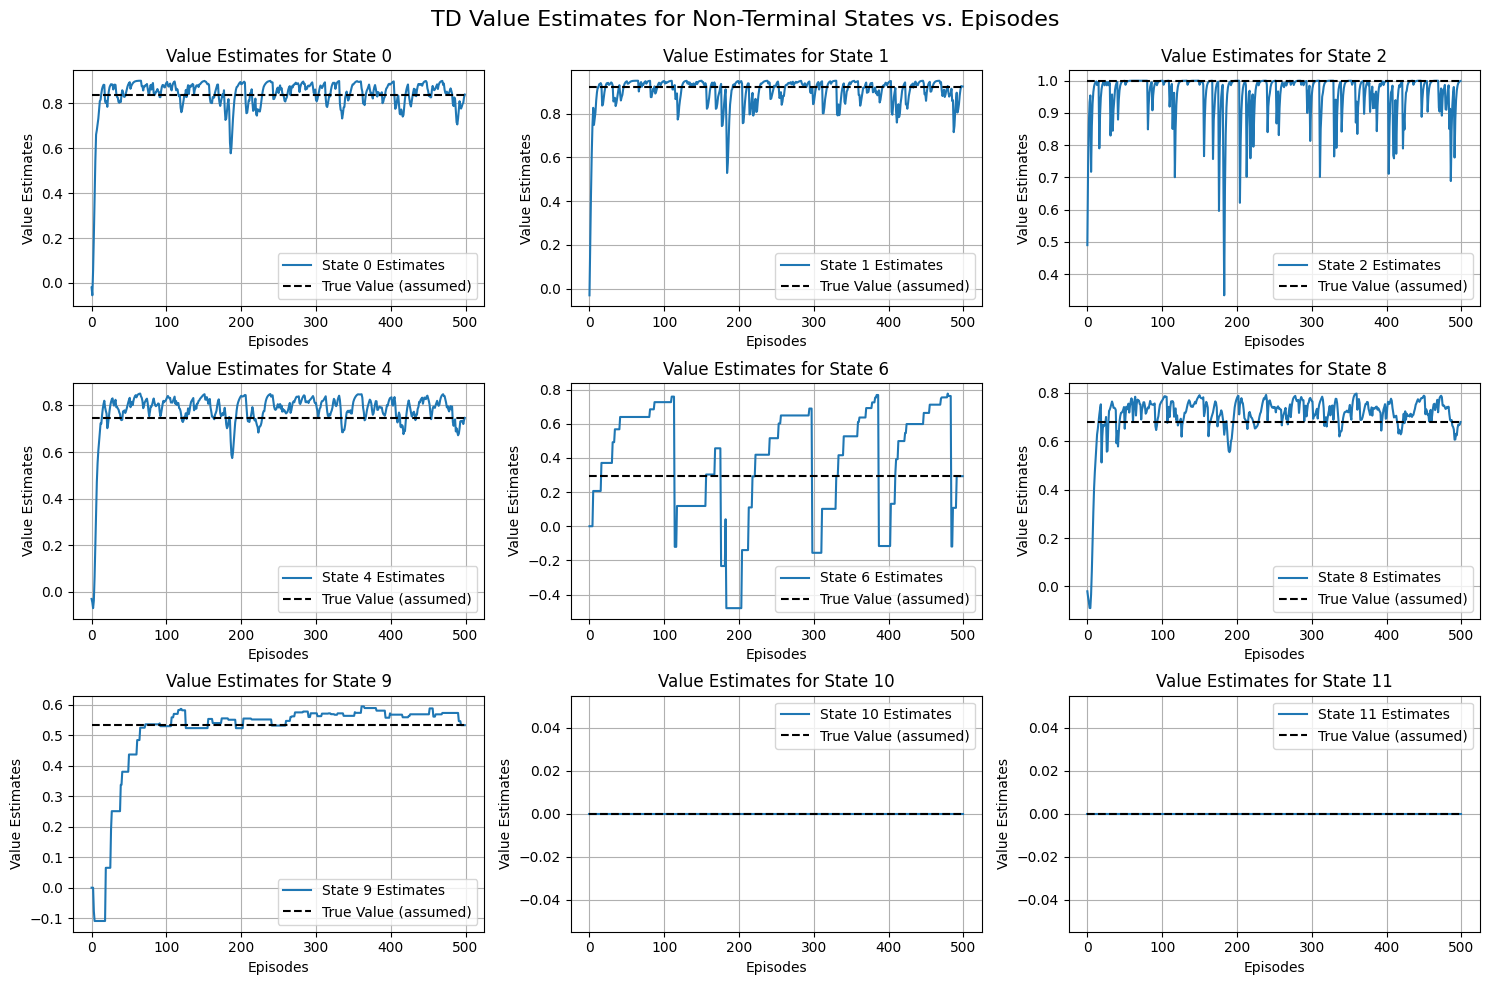

In [91]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"
global_seed = 123

state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# TD Averaged plot

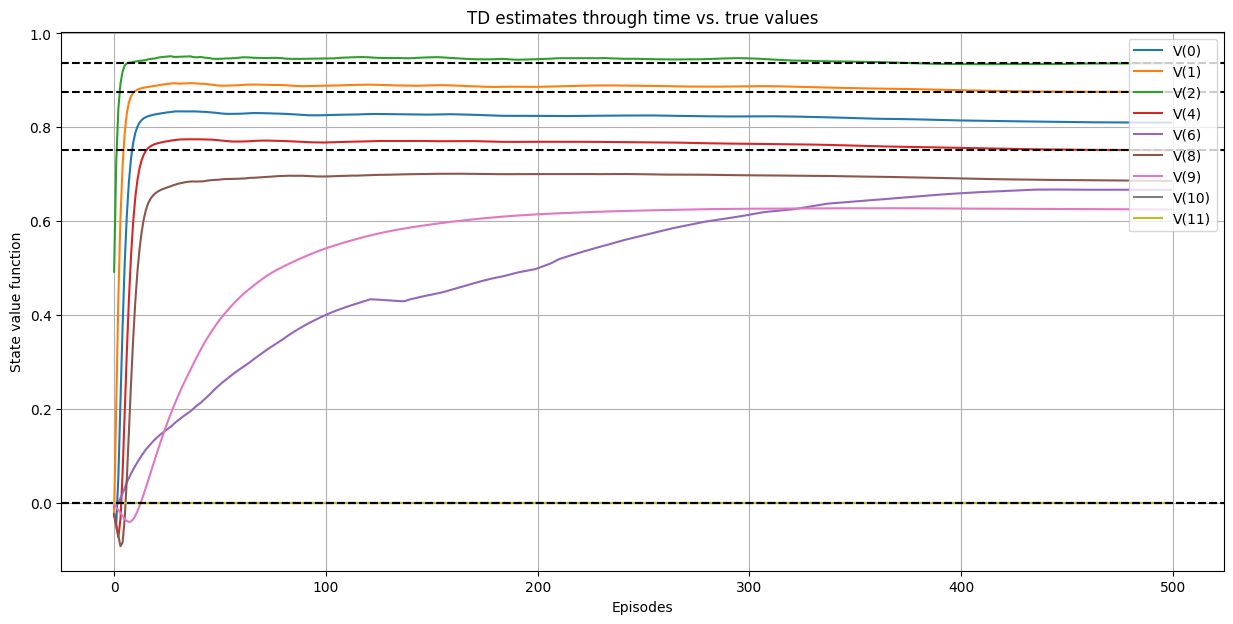

In [106]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# TD Averaged (log Episodes)

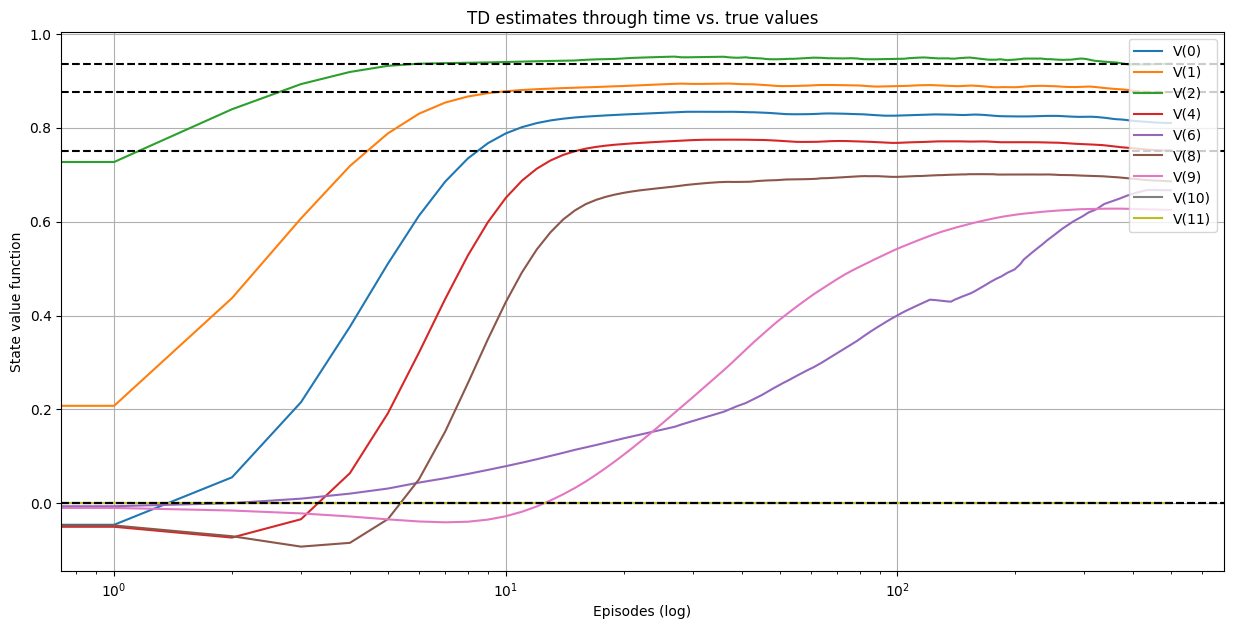

In [154]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# n step TD implementation

In [155]:
# Implementing the n step TD algorithm
def nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed):
    # Initialize the values with zeros
    values = np.zeros(env.observation_space.n)
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    values_eps = []

    for episode in range(numEpisodes):
        # Resetting the environment for each episode
        state = env.reset(seed=global_seed + episode)
        states = [state]
        rewards = [0]
        T = float('inf')
        tau = 0  # Time step being updated
        t = 0  # Current time step

        while tau < T - 1:
            if t < T:
                action = policy[state]
                next_state, reward, done, _ = env.step(action)
                states.append(next_state)
                rewards.append(reward)
                if done:
                    T = t + 1
            tau = t - n + 1  # State to update

            if tau >= 0:
                G = sum([gamma**(i-tau-1) * rewards[i] for i in range(tau+1, min(tau+n, T)+1)])
                if tau + n < T:
                    G += gamma**n * values[states[tau+n]]
                state_to_update = states[tau]
                values[state_to_update] += alphas[episode] * (G - values[state_to_update])

            t += 1
            state = next_state

        values_eps.append(np.copy(values))

    return values_eps

In [156]:
gamma = 0.99
numEpisodes = 100
initialValue = 0.1
finalValue = 0.01
decayType = "exponential"
global_seed = 123
n = 6

values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
print(values[numEpisodes - 1])

[0.85221593 0.90881164 0.98175856 0.         0.7825986  0.
 0.27182543 0.         0.70958657 0.2670623  0.         0.        ]


# Constant alpha (n step TD)

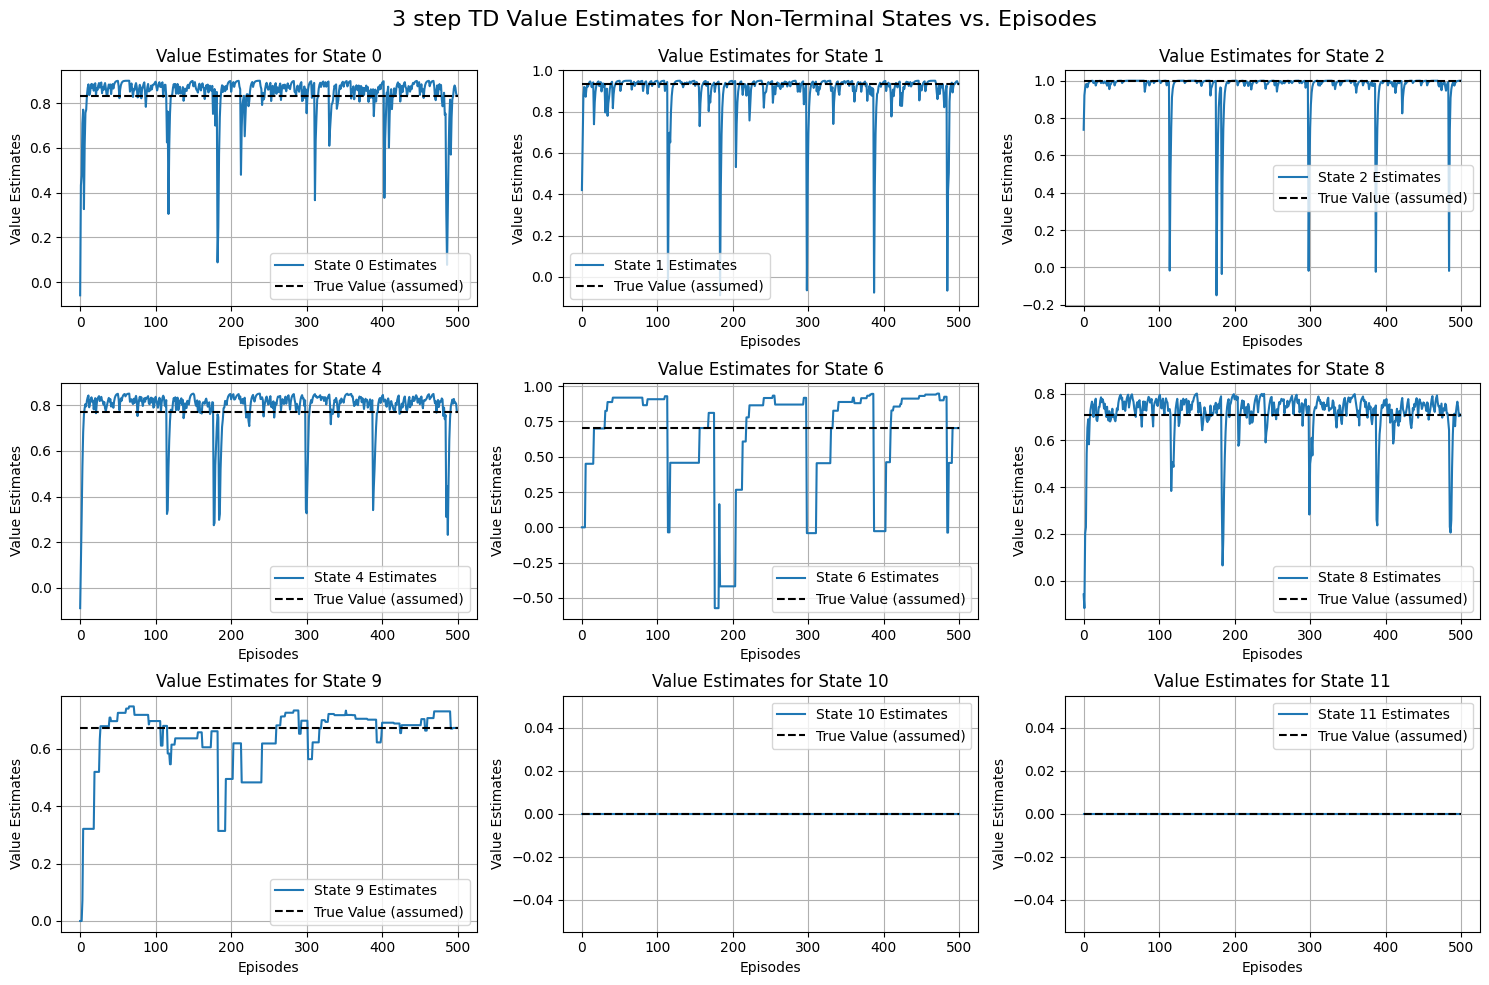

In [157]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123
n = 3

state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('3 step TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# n step TD (log Scale Episode)

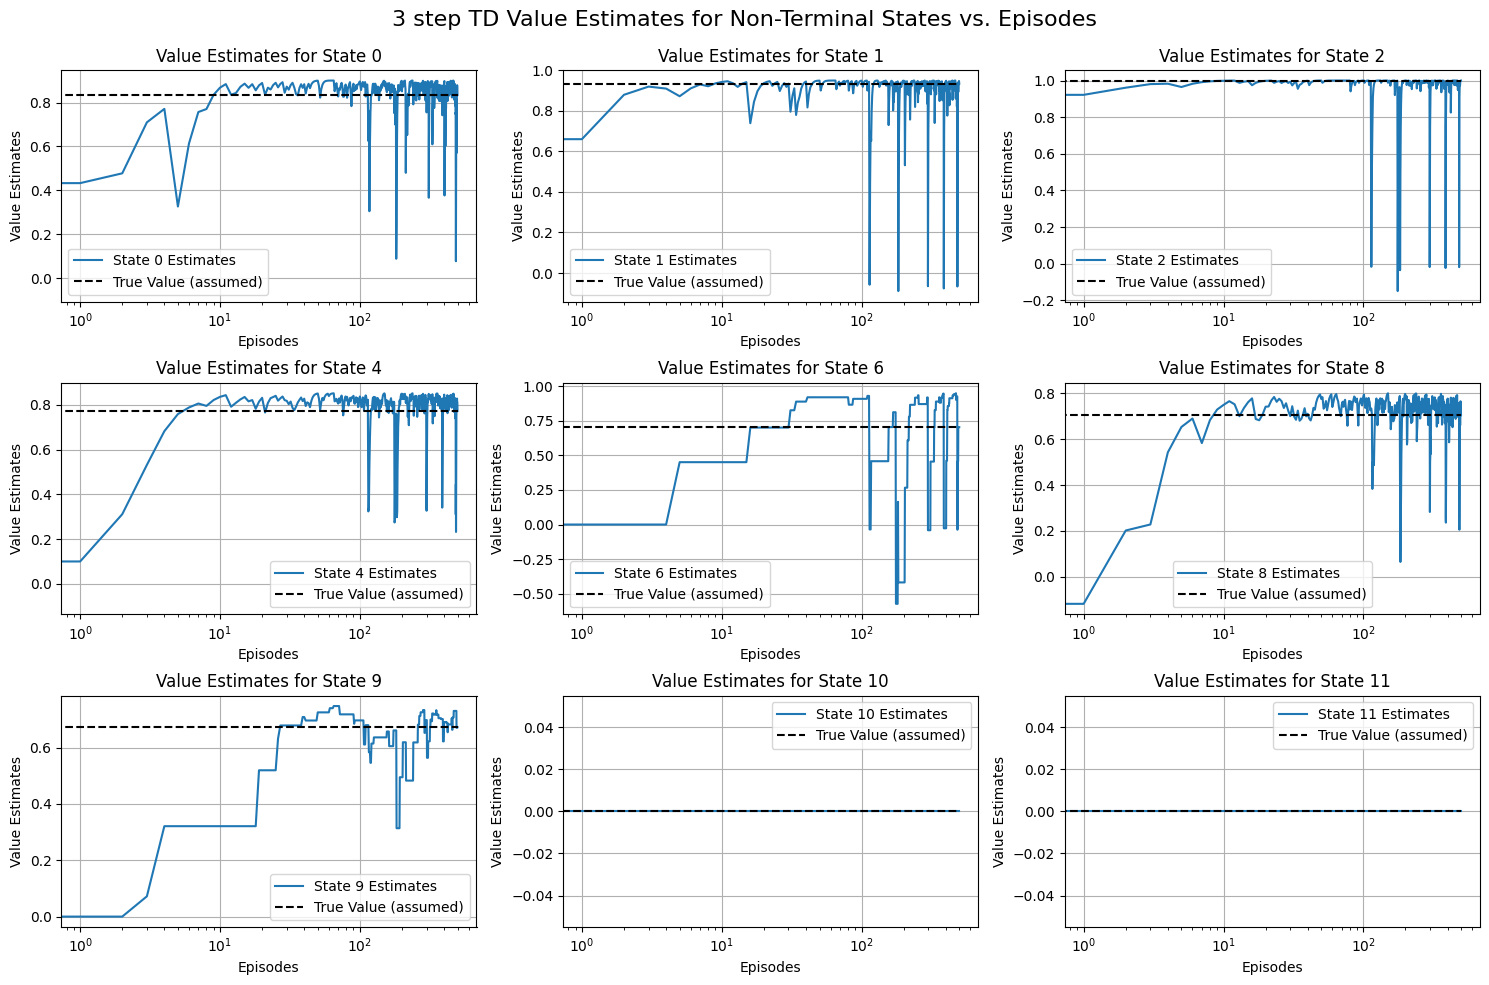

In [103]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123
n = 3

state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xscale("log")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('3 step TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

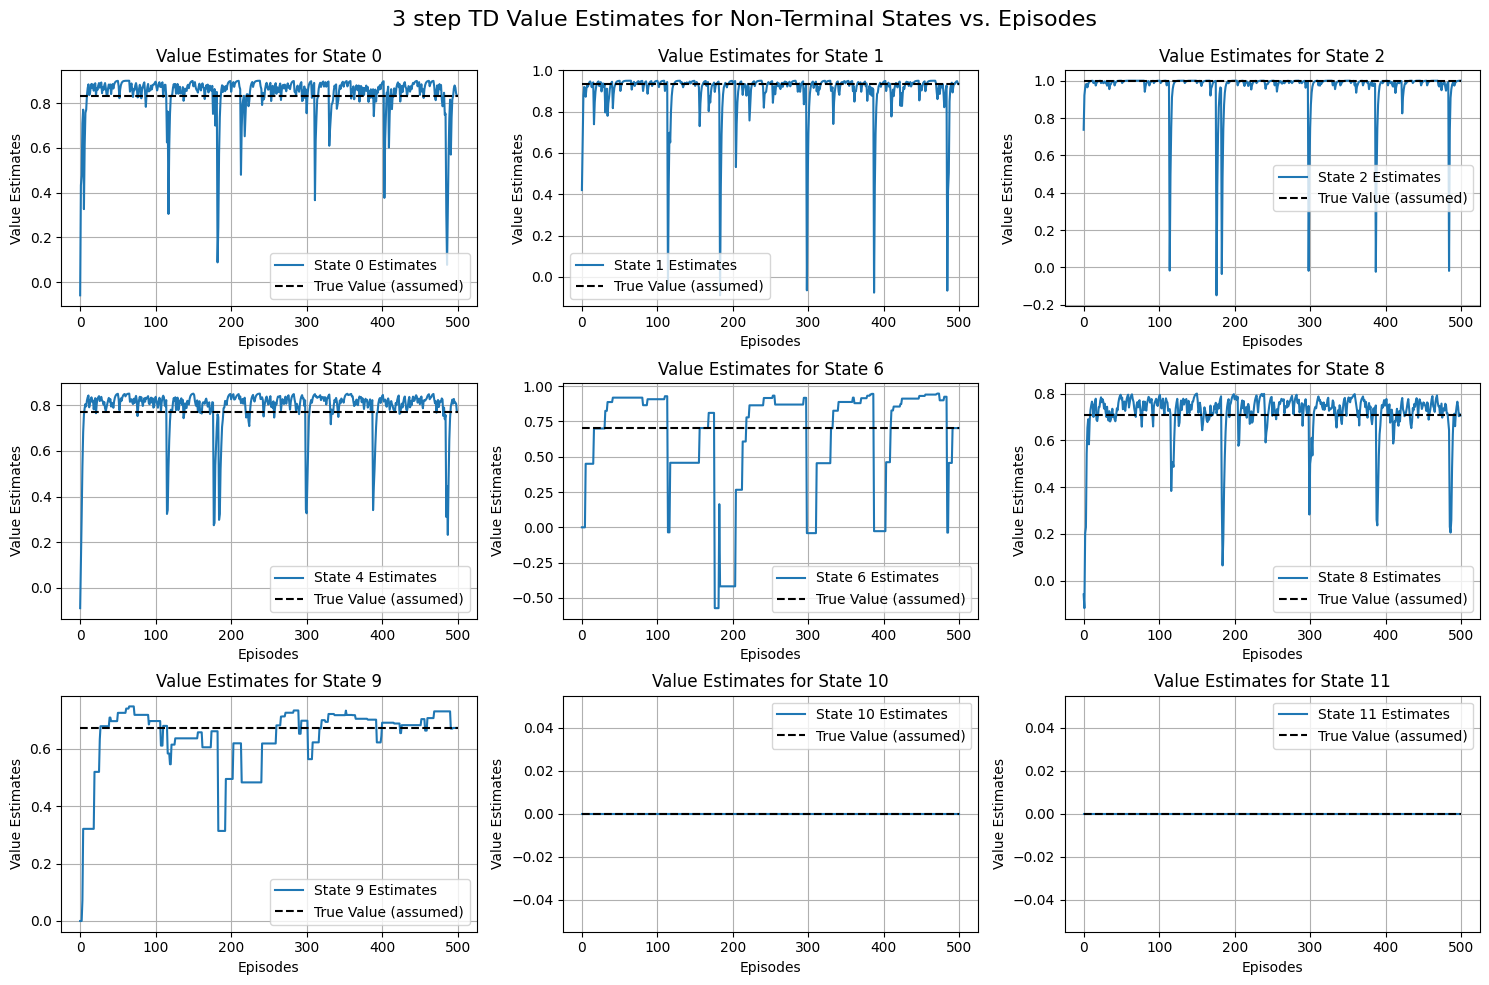

In [110]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123
n = 3

state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('3 step TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# 6 step TD Averaged plots


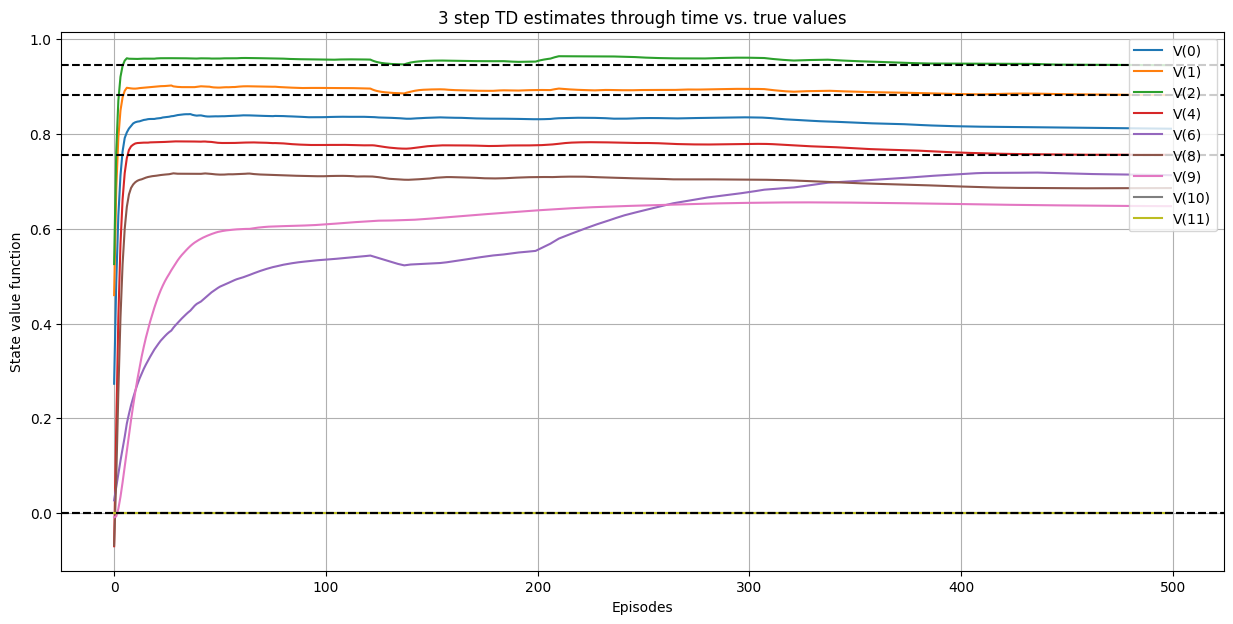

In [140]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
n = 3

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('3 step TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# N Step TD (exponential alpha)

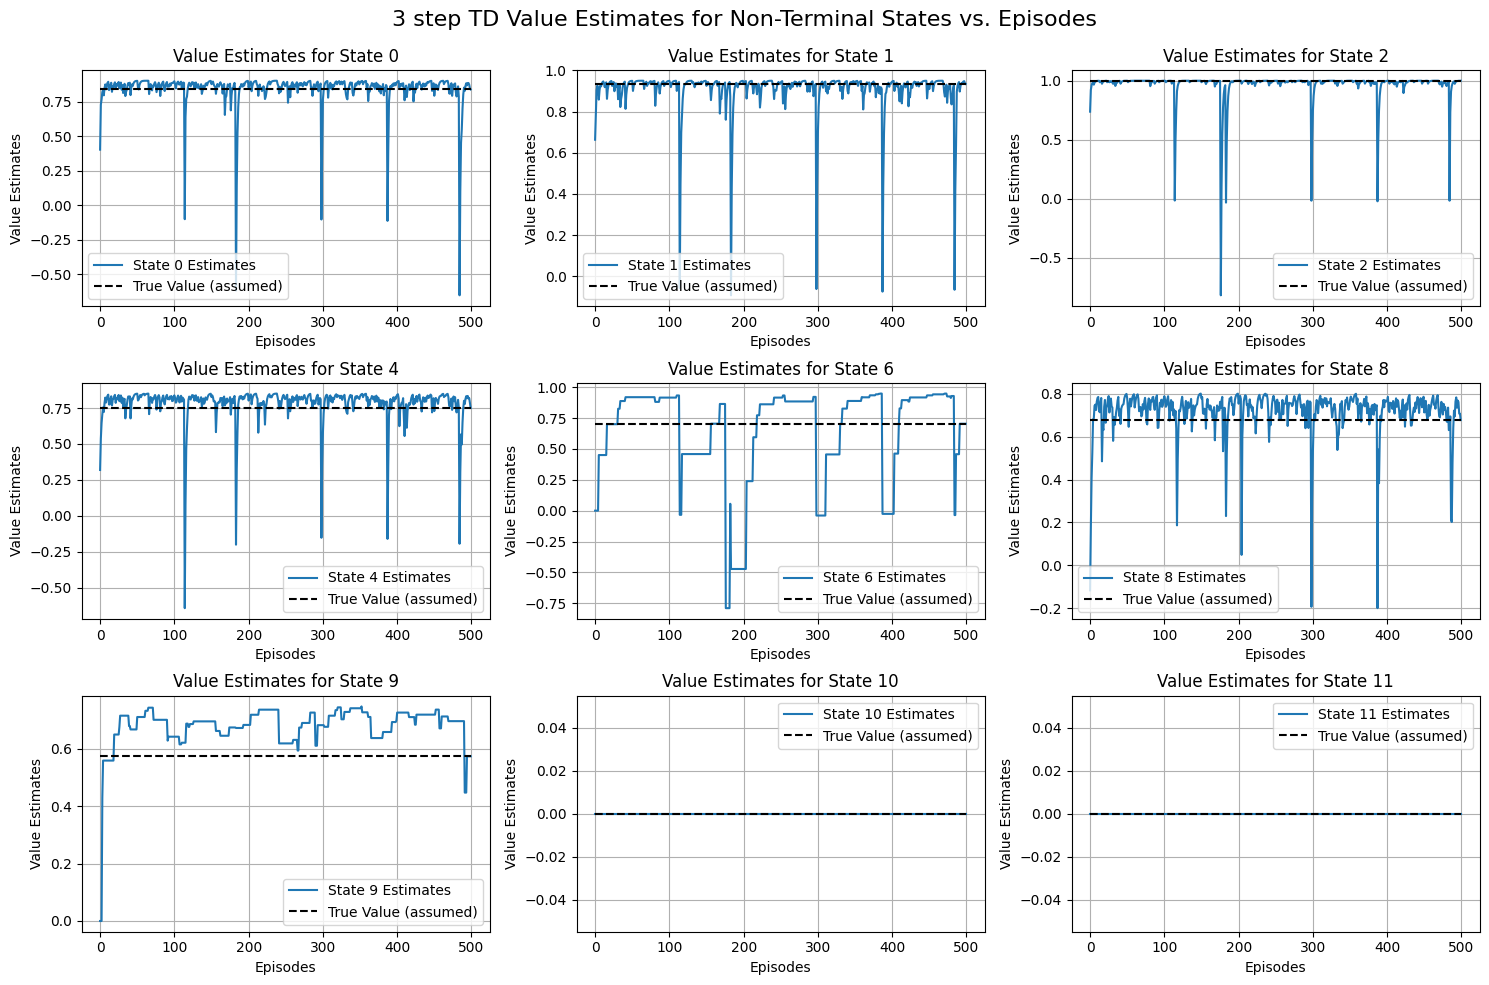

In [101]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"
global_seed = 123
n = 6

state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('3 step TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# n Step TD (log Scale episodes)

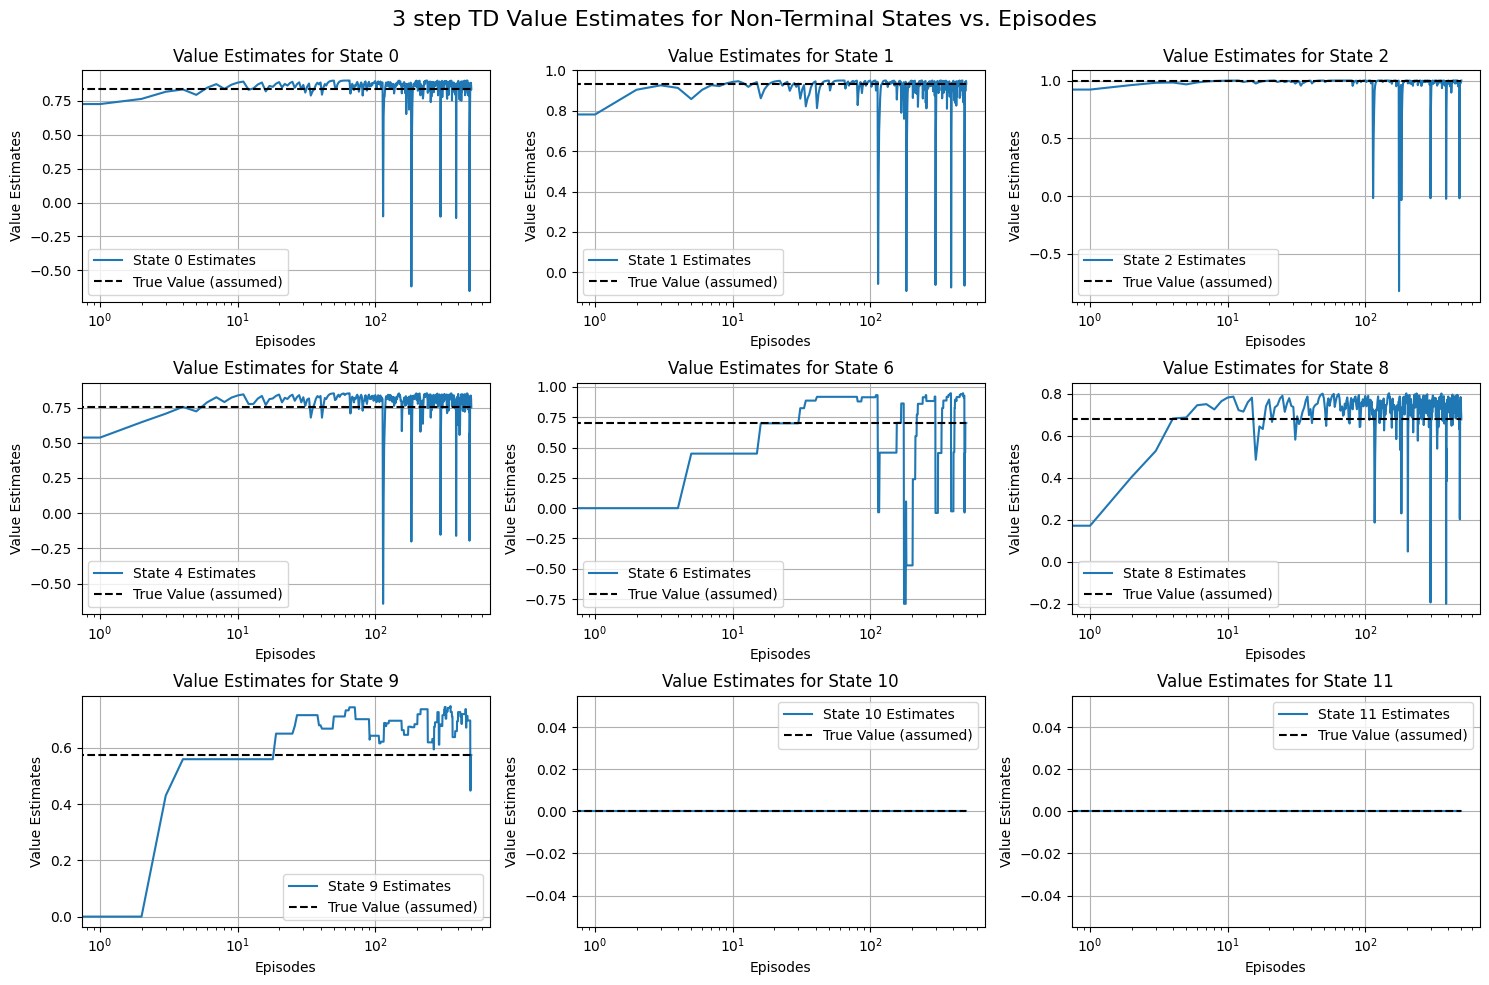

In [102]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"
global_seed = 123
n = 6

state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      plt.xscale('log')
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle('3 step TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# 6 step TD Averaged plots

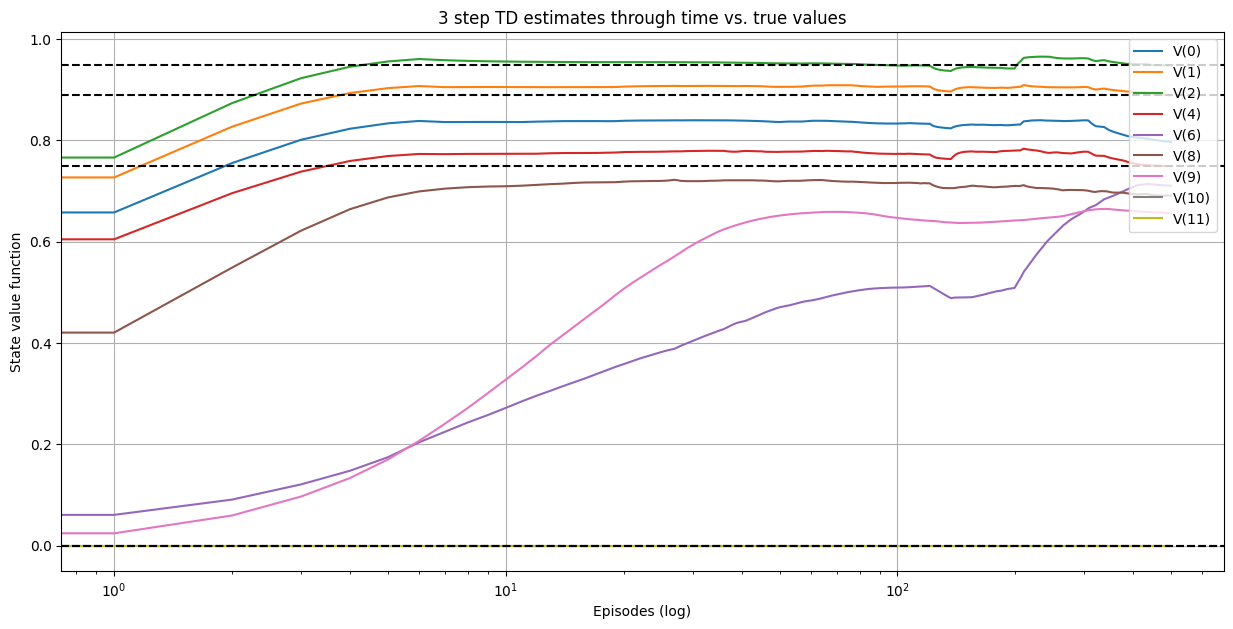

In [160]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
n = 6

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('3 step TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# 3 Step TD Averaged plots

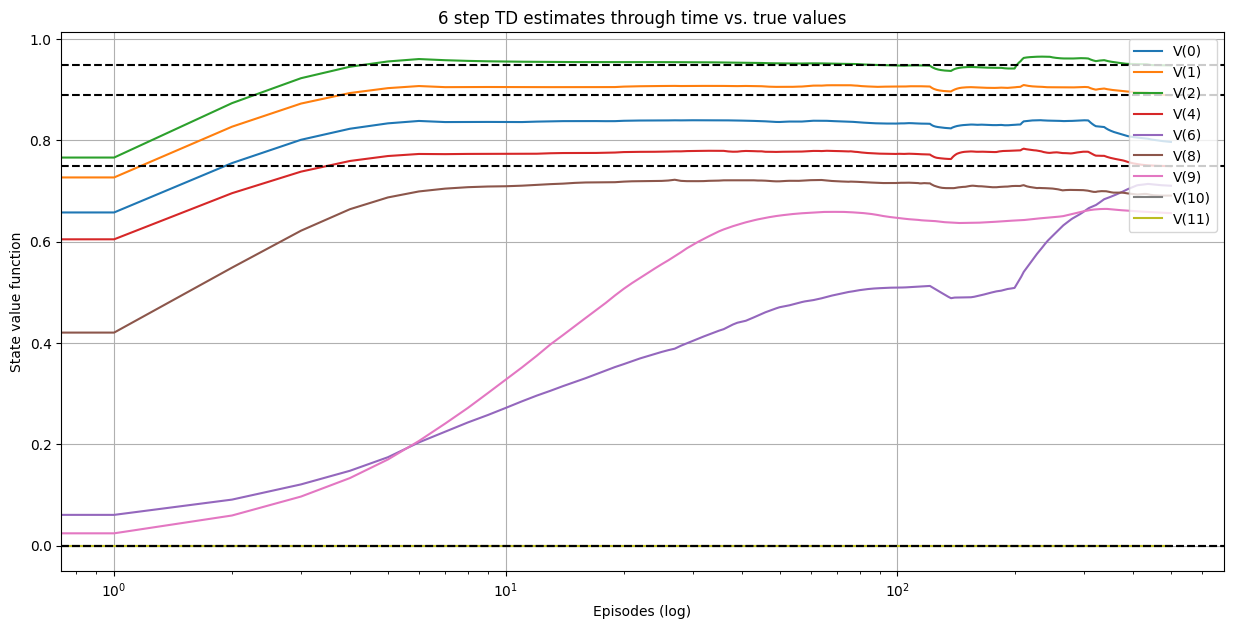

In [169]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
n = 6

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = nStepTemporalDifferencePrediction(env, policy, n, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('6 step TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# TD (λ) algorithm implementation

In [158]:
# Implementing the TD(lambda) algorithm
def TD_lambda(env, policy, initialValue, finalValue, gamma, lambda_, num_episodes, decayType, global_seed):

    values = np.zeros(env.observation_space.n)  # Initialize the value function to zeros
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    values_eps = []
    for episode in range(num_episodes):
        state = env.reset(seed = global_seed + episode)
        E = np.zeros(env.observation_space.n)  # Initialize eligibility traces
        done = False
        while not done:
            action = policy[state]
            next_state, reward, done, _ = env.step(action)

            td_error = reward + gamma * values[next_state] - values[state]
            E[state] += 1  # Update eligibility trace for the current state

            values += alphas[episode] * td_error * E  # Update value function for all states using eligibility traces
            E = gamma * lambda_ * E  # Decay eligibility traces
            state = next_state
        values_eps.append(values)

    return values_eps

In [159]:
gamma = 0.99
numEpisodes = 100
initialValue = 0.1
finalValue = 0.01
decayType = "exponential"
global_seed = 123
lambda_ = 0.3

values = TD_lambda(env, policy, initialValue, finalValue, gamma, lambda_, numEpisodes, decayType, global_seed)
print(values[0])

[0.67839927 0.83452588 0.93943349 0.         0.5433055  0.
 0.20938696 0.         0.34842854 0.03316801 0.         0.        ]


# TD (Λ) ( linear alpha)


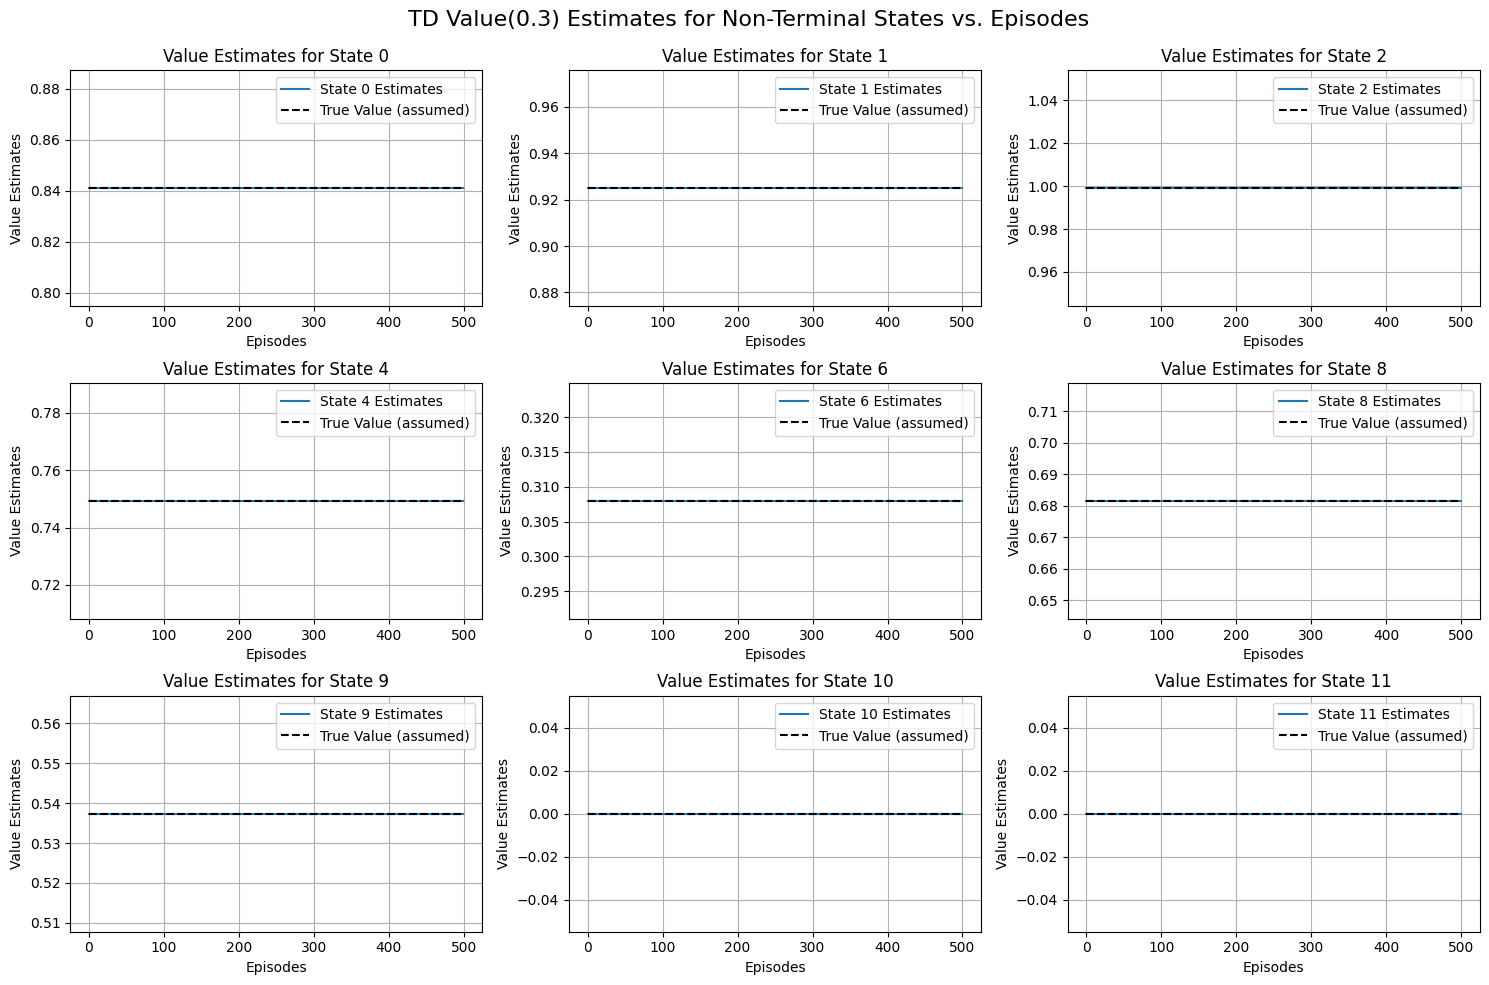

In [167]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"
global_seed = 123
n = 6
lambda_ = 0.03

state_values = TD_lambda(env, policy, initialValue, finalValue, gamma, lambda_, numEpisodes, decayType, global_seed)


plt.figure(figsize=(15, 10))
idx = 1
for state in range(12):  # Loop through non-terminal states
    if state not in [3,7, 5]:
      plt.subplot(3,3, idx)
      idx += 1
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
      plt.plot(values_per_state, label=f'State {state} Estimates')
      plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
      # plt.xscale('log')
      plt.xlabel('Episodes')
      plt.ylabel('Value Estimates')
      plt.title(f'Value Estimates for State {state}')
      plt.legend()
      plt.grid()
      plt.tight_layout()

plt.suptitle(' TD Value(0.3) Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# TD (λ) Averaged plots

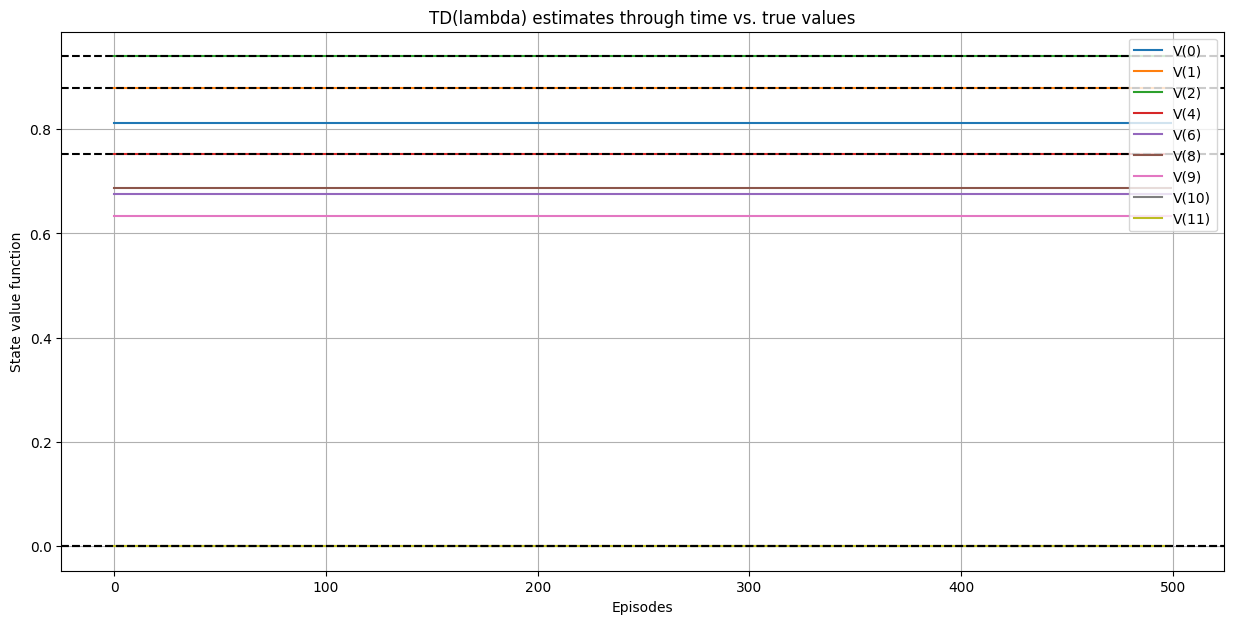

In [135]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
lambda_ = 0.3

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = TD_lambda(env, policy, initialValue, finalValue, gamma, lambda_, numEpisodes, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('TD(lambda) estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# TD (Λ) Averaged (log Scale Episodes)

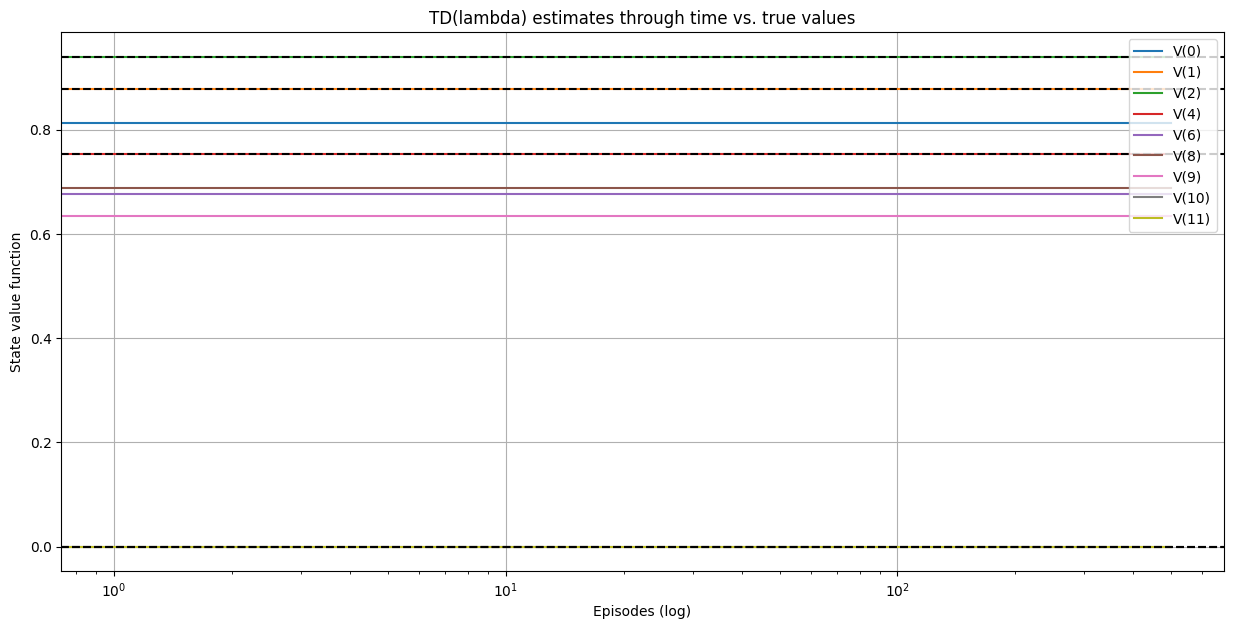

In [164]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
lambda_ = 0.3

cumulative_state_values = {s : [0]*numEpisodes for s in range(12) if s not in [3,5,7]}
true_values = [0]*9
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = TD_lambda(env, policy, initialValue, finalValue, gamma, lambda_, numEpisodes, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(12):
    if state not in [3,5,7]:
      values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

      # taking the cumulative sum for each state over different seeds
      cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(12):  # Loop through non-terminal states
    if state not in [3,5,7]:
      plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('TD(lambda) estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Target vs Episodes plots (EVMC) for state 4




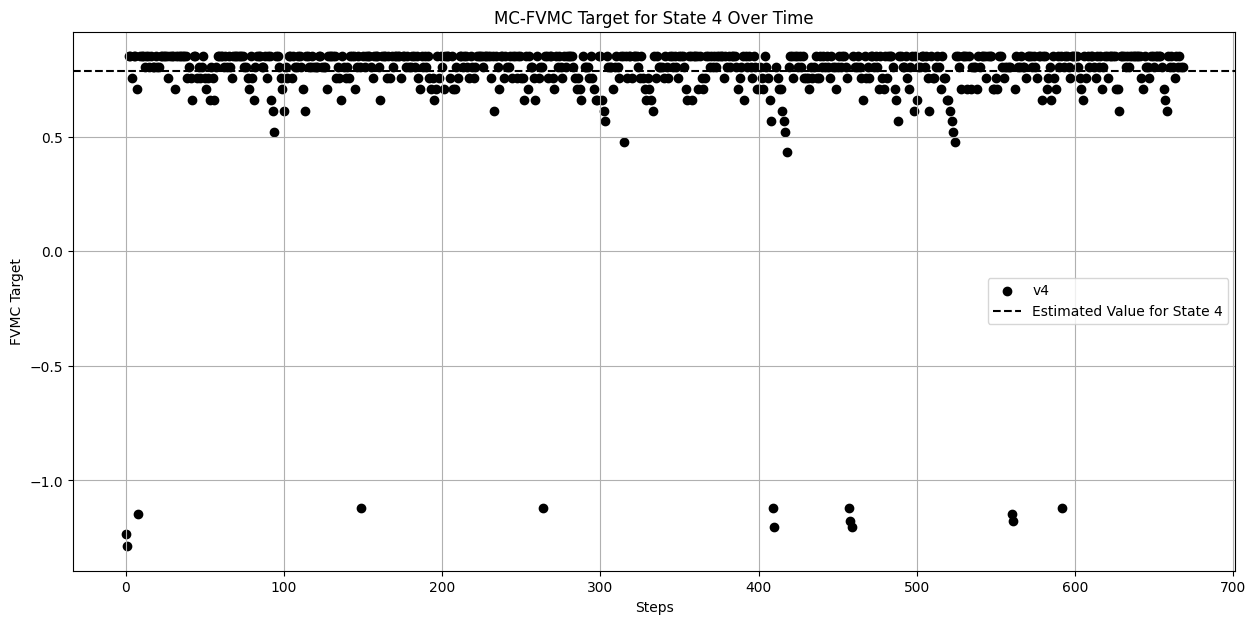

In [137]:
# Implementing the Monte Carlo prediction (FVMC) for extraction of target score
def MonteCarloPrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed):
    values = np.zeros(env.observation_space.n)
    values_eps = []
    returns = {s: [] for s in range(env.observation_space.n)}
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    # List to store the returns (G) for a specific state
    state_returns = []

    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        trajectory = generateTrajectory(env, policy, maxSteps, seed = episode_seed)
        if not trajectory:
            continue
        G = 0
        visited_states = set()

        for traj_idx in range(len(trajectory)-1, -1, -1):
            state, action, reward, next_state, done = trajectory[traj_idx]
            G = gamma * G + reward

            if mctype == "FVMC" and state not in visited_states:
                values[state] += alphas[episode] * (G - values[state])
                visited_states.add(state)
            elif mctype == "EVMC":
                values[state] += alphas[episode] * (G - values[state])
            # If this state is the specific state we are interested in, record the return
            if state == specific_state:
                state_returns.append(G)

        values_eps.append(np.copy(values))

    return values_eps, state_returns

# obtaining target score for state 4
specific_state = 4

values_eps, td_targets = MonteCarloPrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, "FVMC", global_seed)


plt.figure(figsize = (15, 7))
# Plot the TD-targets for the specific state
plt.scatter(range(len(td_targets)), td_targets, color = "black", label = "v{}".format(specific_state))
plt.axhline(y=values_eps[numEpisodes - 1][specific_state], color='k', linestyle='--',label=f"Estimated Value for State {specific_state}")
plt.xlabel('Steps')
plt.ylabel('FVMC Target')
plt.title(f'MC-FVMC Target for State {specific_state} Over Time')
plt.grid()
plt.legend()
plt.show()

# EVMC

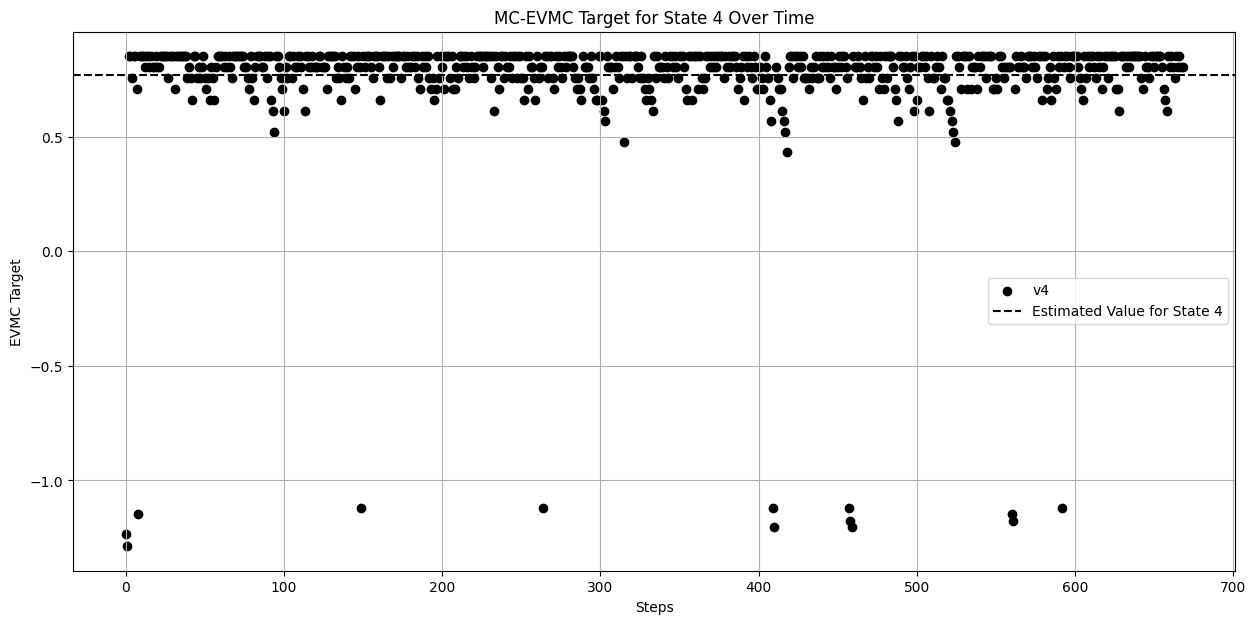

In [138]:
# obtaining target score for state 4
specific_state = 4
values_eps, td_targets = MonteCarloPrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, "EVMC", global_seed)

plt.figure(figsize = (15, 7))
# Plot the TD-targets for the specific state
plt.scatter(range(len(td_targets)), td_targets, color = "black", label = "v{}".format(specific_state))
plt.axhline(y=values_eps[numEpisodes - 1][specific_state], color='k', linestyle='--',label=f"Estimated Value for State {specific_state}")
plt.xlabel('Steps')
plt.ylabel('EVMC Target')
plt.title(f'MC-EVMC Target for State {specific_state} Over Time')
plt.grid()
plt.legend()
plt.show()

# Target vs Episodes (TD) for State 4


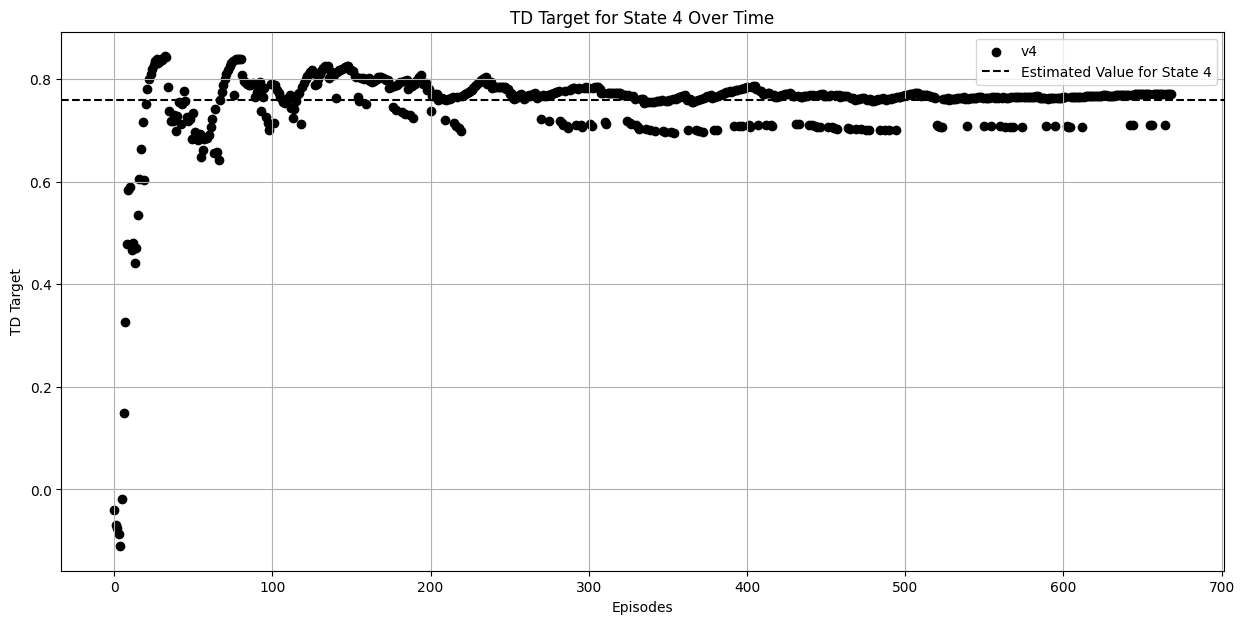

In [139]:
# Implementing the temporal difference for target score extraction
def TemporalDifferencePrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, specific_state, global_seed):
    # Initialize the values with zeros
    values = np.zeros(env.observation_space.n)
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    values_eps = []
    targets = []  # List to store the TD-targets for the specific state

    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        state = env.reset(seed = episode_seed)
        for step in range(maxSteps):
            action = policy[state]
            next_state, reward, done, _ = env.step(action)
            td_target = reward + gamma * values[next_state] if not done else reward

            if state == specific_state:
                targets.append(td_target)  # Track the TD targets for the specific state

            td_error = td_target - values[state]
            values[state] += alphas[episode] * td_error
            if done:
                break
            state = next_state

        values_eps.append(np.copy(values))

    return values_eps, targets

# Set the specific state you want to track
specific_state = 4
values_eps, td_targets = TemporalDifferencePrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, specific_state, global_seed)
plt.figure(figsize = (15, 7))
# Plot the TD-targets for the specific state
plt.scatter(range(len(td_targets)), td_targets, color="black", label=f"v{specific_state}")
plt.axhline(y=values_eps[-1][specific_state], color='k', linestyle='--', label=f"Estimated Value for State {specific_state}")
plt.xlabel('Episodes')
plt.ylabel('TD Target')
plt.title(f'TD Target for State {specific_state} Over Time')
plt.grid()
plt.legend()
plt.show()

# Comparative Analysis of different algorithms

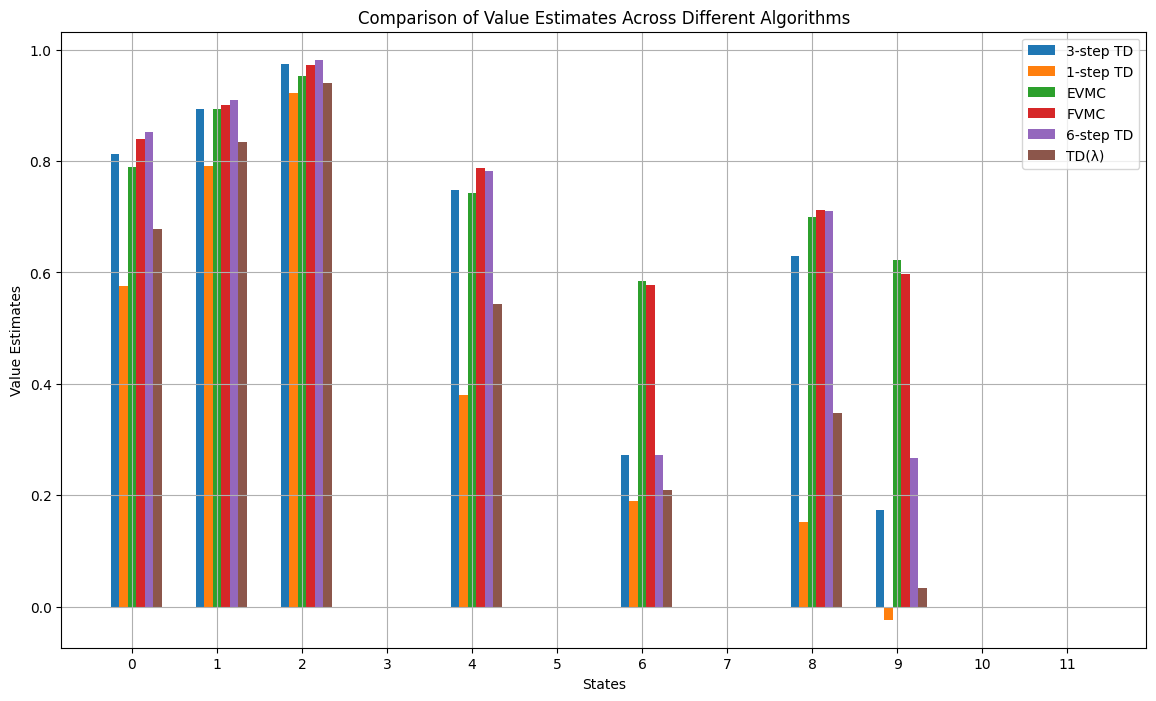

In [166]:
import matplotlib.pyplot as plt


# Values obtained from different TD methods
values_3_step_td = [0.81272677, 0.89310949, 0.973232, 0, 0.74745274, 0, 0.2721138, 0, 0.6302765, 0.17346252, 0, 0]
values_1_step_td = [0.57487668, 0.79156486, 0.92202897, 0, 0.38064506, 0, 0.19021933, 0, 0.15142168, -0.0232719, 0, 0]
values_evmc = [0.7899814, 0.89408258, 0.95221384, 0, 0.74312794, 0, 0.58508974, 0, 0.70036148, 0.62149405, 0, 0]
values_fvmc = [0.84003489, 0.89973816, 0.97160289, 0, 0.78666412, 0, 0.57764719, 0, 0.71118601, 0.59731641, 0, 0]
values_6_step_td = [0.85221593, 0.90881164, 0.98175856, 0, 0.7825986, 0, 0.27182543, 0, 0.70958657, 0.2670623, 0, 0]
values_td_lambda = [0.67839927, 0.83452588, 0.93943349, 0, 0.5433055, 0, 0.20938696, 0, 0.34842854, 0.03316801, 0, 0]

# States for which the values are compared
states = np.arange(len(values_3_step_td))

# Setting the positions and width for the bars
pos = np.arange(len(states))
bar_width = 0.1

# Plotting
plt.figure(figsize=(14, 8))

plt.bar(pos - 2*bar_width, values_3_step_td, bar_width, label='3-step TD')
plt.bar(pos - bar_width, values_1_step_td, bar_width, label='1-step TD')
plt.bar(pos, values_evmc, bar_width, label='EVMC')
plt.bar(pos + bar_width, values_fvmc, bar_width, label='FVMC')
plt.bar(pos + 2*bar_width, values_6_step_td, bar_width, label='6-step TD')
plt.bar(pos + 3*bar_width, values_td_lambda, bar_width, label='TD(λ)')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Value Estimates')
plt.title('Comparison of Value Estimates Across Different Algorithms')
plt.xticks(pos, states)
plt.legend()
plt.grid()

plt.show()
